<a href="https://colab.research.google.com/github/PrajwalNazre23/code/blob/main/GUVI_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [42]:
df = pd.read_csv("car_data.csv")

In [43]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


task1

In [44]:
x=df[['Mileage']]
y=df[['Price']]

In [45]:
linreg=linear_model.LinearRegression()
linreg.fit(x,y)
print('intercept:',linreg.intercept_)
print('coefficients:',linreg.coef_)
print('r-squared:',linreg.score(x,y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


Text(0.5, 1.0, 'Mlieage and price')

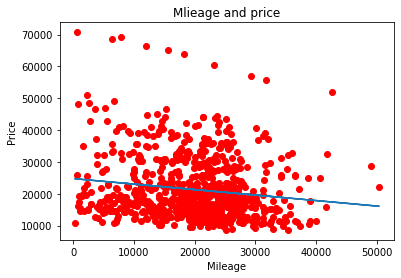

In [46]:
plt.scatter(x,y,color='r')
plt.plot(x,linreg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mlieage and price')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X 

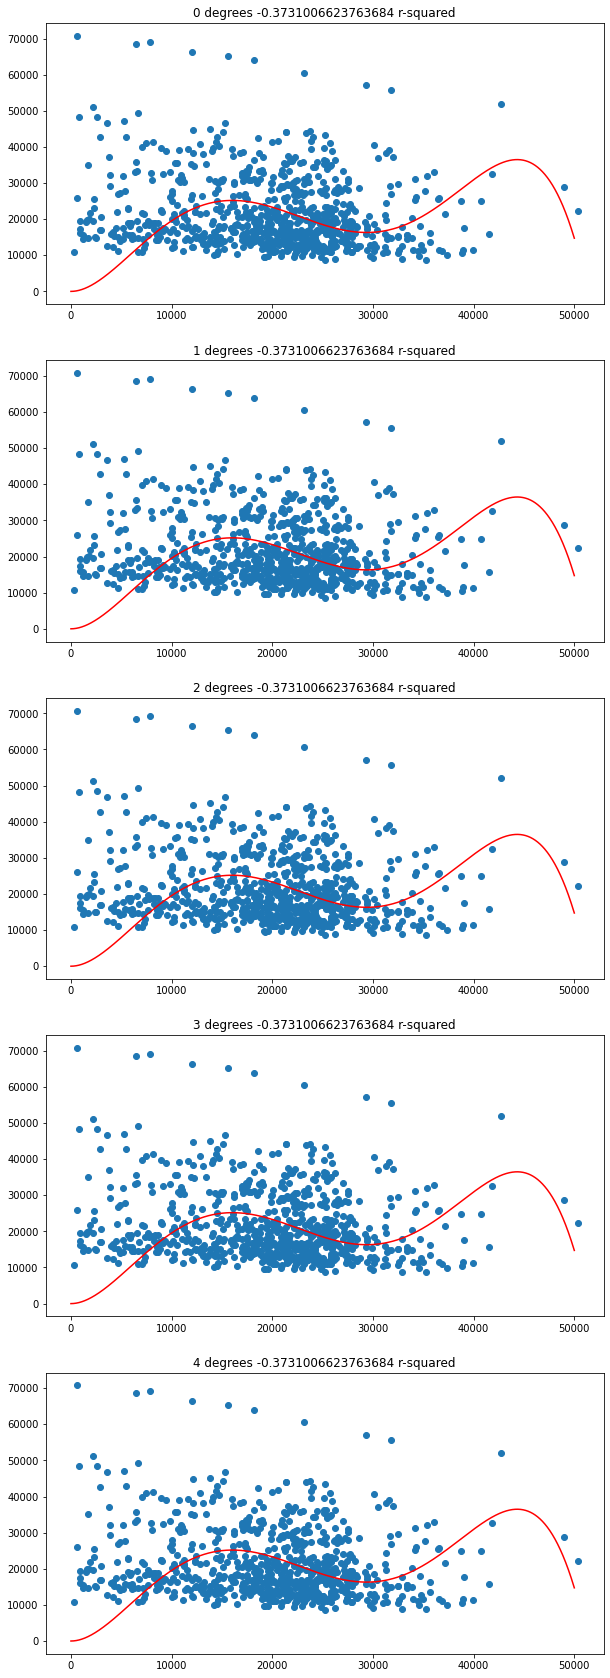

In [47]:
degrees=5
fig, axs=plt.subplots(degrees, figsize=(10, 30))

for degree in range(degrees):
     model= Pipeline([
         ('poly', PolynomialFeatures(degree=degrees)),
         ('linear', linear_model.LinearRegression(fit_intercept=False))])
     
     points=50000

     model=model.fit(x,y)
     model_score=model.score(x,y)
      
     subplot=axs[degree]
     subplot.plot(model.predict([[j] for j in range(points)]), color='r')
     subplot.scatter(x,y) 
     subplot.set_title('{} degrees {} r-squared'.format(degree,model_score))
plt.show()

task 2


In [37]:
feature=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
x=df[feature]
y=df[['Price']]

In [38]:
linreg=linear_model.LinearRegression()
linreg.fit(x,y)
print('intercept:', linreg.intercept_)
print('coefficients:',linreg.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [39]:
print('r-squared:',linreg.score(x,y))

r-squared: 0.4462643536728379
